In [1]:
import pandas as pd 
import pickle 


In [2]:
# with open("results/ARFF_CNS.pkl",'rb') as f:
#     results=pickle.load(f)
# db=pd.read_csv("after_preprocess/"+"ARFF_CNS"+".csv",header=0)
# columns=list(db.columns)

In [3]:
def get_fold(x):
    if x<50:
        return "Leave-pair-out"
    elif x<=100:
        return "LOOCV"
    elif x<=1000:
        return "StratifiedKFold n_splits = 10"
    else:
        return "StratifiedKFold n_splits = 5"


def turn_resDict_to_df(results,columns):
    all_df=[]
    for algo_name,fs_algo_lst in list(results.items())[:-3]:
        # database_name= results
        for k, k_res in list(fs_algo_lst.items())[:-1]:
            fs_time= fs_algo_lst["fs_algo"]
            chosen_features= k_res["chosen_features"]
            feature_rank= k_res["feature_rank"]
            for clf_name,clf_res in list(k_res.items())[2:]:
                for fold_name, fold_res in clf_res.items():
                    # print(fold_res)
                    infrence_time=fold_res["infrence_time"]
                    # del fold_res["infrence_time"]
                    temp_d=pd.DataFrame.from_dict(fold_res, orient='index')
                    temp_d.reset_index(inplace=True)
                    temp_d=temp_d.melt(id_vars='index')
                    temp_d.drop(columns=['variable'],inplace=True)
                    temp_d["infrence_time"]=[infrence_time]*temp_d.shape[0]
                    temp_d["Learning algorithm"]=[clf_name]*temp_d.shape[0]
                    temp_d["Number of features selected (K)"]=[k]*temp_d.shape[0]
                    temp_d["chosen_features"]=[chosen_features]*temp_d.shape[0]
                    temp_d["Selected Features scores"]=[feature_rank]*temp_d.shape[0]
                    temp_d["Filtering Algorithm"]=[algo_name]*temp_d.shape[0]
                    temp_d["Fold"]=[fold_name]*temp_d.shape[0]
                    temp_d["fs_time"]=[fs_time]*temp_d.shape[0]
                    all_df.append(temp_d.copy(deep=True))
    all_df=pd.concat(all_df, ignore_index=True)
    all_df["Dataset Name"]=results["Dataset Name"]
    all_df["Number of samples"]=results["Number of samples"]
    all_df["Original Number of features"]=results["Original Number of features"]
    all_df["chosen_features"]= all_df["chosen_features"].apply(lambda x: [columns[i] for i in x])
    all_df["CV Method"]=get_fold(results["Original Number of features"])
    return all_df


# t=turn_resDict_to_df(results,columns)


In [4]:
# temp= pd.read_csv("after_preprocess/datamicroarray_gravier_results.csv",header=0)

In [5]:
# df= pd.read_csv("results/datamicroarray_gordon_results.csv",header=0)

In [6]:

from os import listdir
from os.path import isfile, join
files= [f for f in listdir("results") if isfile(join("results", f))]


In [7]:
all_files=[]
for file in files:
    all_files.append(pd.read_csv("results/"+file,header=0))
    

In [8]:
len(all_files)

19

In [9]:
df= pd.concat(all_files, ignore_index=True)

In [10]:
#rename index colum to metric
df.rename(columns={"index":"metric"},inplace=True)

In [11]:
def return_best_config(df):
    t= df[df["index"]=="AUC"].groupby(["Filtering Algorithm","Number of features selected (K)","Learning algorithm"]).mean().reset_index()
    t=t.sort_values(by=["value"],ascending=False).iloc[0]
    return t

In [12]:
len(df["Dataset Name"].unique())

19

In [ ]:
#calcalute the number of each Filtering Algorithm was able to achive the best performance in auc index
def mean_of_each_fold(df):
    t= df[df["metric"]=="AUC"].groupby(["Dataset Name","Filtering Algorithm","Number of features selected (K)","Learning algorithm"]).mean().reset_index()
    # t=t.sort_values(by=["value"],ascending=False).iloc[0]
    return t
mean_auc_df= mean_of_each_fold(df)

In [ ]:
mean_auc_df["Filtering Algorithm"].unique()

array(['Genetic', 'MRMR', 'New_dssa', 'ReliefF', 'SVM', 'dssa',
       'f_classif'], dtype=object)

In [ ]:
# mean_aug_df
#calcalute the number of each Filtering Algorithm was able to achive the best performance in auc index
def best_of_dataset(df):
    # t= df.groupby(["Dataset Name"])["value"].agg('max')
    idx=df.groupby(['Dataset Name'])['value'].idxmax()
    t=df.loc[idx]
    return t
best_df= best_of_dataset(mean_auc_df)

In [ ]:
best_df

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features
222,ARFF_Breast,ReliefF,25,LogisticRegression,0.931373,0.110761,0.0,2.474507,97.0,24188.0
827,ARFF_CNS,f_classif,30,LogisticRegression,0.915751,0.156794,0.0,0.021078,60.0,7129.0
1062,ARFF_Leukemia,ReliefF,25,LogisticRegression,0.999149,0.077334,0.0,0.162920,72.0,7129.0
1663,ARFF_Lung,f_classif,25,RandomForestClassifier,0.996654,0.001173,4.5,0.065770,203.0,12600.0
1802,ARFF_Ovarian,New_dssa,1,LogisticRegression,0.592006,0.000002,4.5,185.613974,253.0,15154.0
2472,bioconductor_ALL,f_classif,3,LogisticRegression,0.937615,0.000003,4.5,0.051654,128.0,12625.0
2520,bioconductor_COPDSexualDimorphism,Genetic,1,GaussianNB,0.754692,0.000007,4.5,1818.737294,229.0,14498.0
3359,bioconductor_DLBCL,f_classif,100,SVC,0.876134,0.000007,4.5,0.020433,194.0,3583.0
3597,bioconductor_bcellViper,ReliefF,100,LogisticRegression,0.986485,0.000512,4.5,114.639909,211.0,6249.0
4152,datamicroarray_alon,f_classif,3,LogisticRegression,0.943182,0.094356,0.0,0.007630,62.0,2000.0


In [ ]:
# t= best_df.groupby("Filtering Algorithm")["Dataset Name"].count().reset_index()
# for algo in mean_auc_df["Filtering Algorithm"].unique():
#     if algo not in t["Filtering Algorithm"].unique():
#         t=t.append({"Filtering Algorithm":algo,"Dataset Name":0},ignore_index=True)

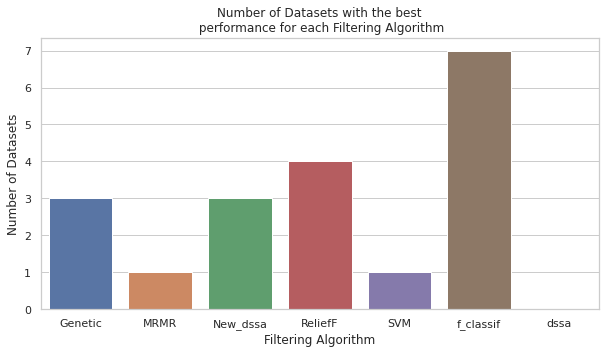

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
t= best_df.groupby("Filtering Algorithm")["Dataset Name"].count().reset_index()
for algo in mean_auc_df["Filtering Algorithm"].unique():
    if algo not in t["Filtering Algorithm"].unique():
        t=t.append({"Filtering Algorithm":algo,"Dataset Name":0},ignore_index=True)

# sns.barplot(best_df, x="Filtering Algorithm",)
plt.figure(figsize=(10,5))

sns.barplot(data= t,x="Filtering Algorithm",y="Dataset Name",)
#rename axis 
plt.xlabel("Filtering Algorithm")
plt.ylabel("Number of Datasets")
plt.title("Number of Datasets with the best\n performance for each Filtering Algorithm")
#change the fig size 
plt.show()

In [ ]:
#fuller picture about the best performing algorithms
def rank_Filtering_of_dataset(df):
    # t= df.groupby(["Dataset Name"])["value"].agg('max')
    idx=df.groupby(['Dataset Name',"Filtering Algorithm"])['value'].idxmax()
    n_algo= len(df["Filtering Algorithm"].unique())
    t=df.loc[idx]
    t.sort_values(by=["Dataset Name","value"],ascending=False,inplace=True)
    #group by and iterate over the dataset names and add the position of each algorithm in the list
    t["rank"]=n_algo-t.groupby(["Dataset Name"])["Filtering Algorithm"].cumcount()
    return t
algo_ranking= rank_Filtering_of_dataset(mean_auc_df)


In [ ]:
algo_ranking

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features,rank
7574,scikit_arcene,Genetic,3,SVC,0.565499,0.000006,4.5,681.031457,200.0,9961.0,7
7622,scikit_arcene,MRMR,1,LogisticRegression,0.549495,0.000003,4.5,267.485115,200.0,9961.0,6
7804,scikit_arcene,SVM,1,SVC,0.526199,0.000024,4.5,1203.719039,200.0,9961.0,5
7687,scikit_arcene,New_dssa,2,LogisticRegression,0.448895,0.000003,4.5,684.072023,200.0,9961.0,4
7869,scikit_arcene,dssa,2,SVC,0.433949,0.000020,4.5,677.016944,200.0,9961.0,3
...,...,...,...,...,...,...,...,...,...,...,...
59,ARFF_Breast,Genetic,100,SVC,0.823103,0.014161,0.0,137.009383,97.0,24188.0,5
153,ARFF_Breast,New_dssa,15,RandomForestClassifier,0.767690,2.916305,0.0,336.901068,97.0,24188.0,4
293,ARFF_Breast,SVM,50,RandomForestClassifier,0.719309,2.399921,0.0,2062.019784,97.0,24188.0,3
358,ARFF_Breast,dssa,100,RandomForestClassifier,0.706522,3.070847,0.0,327.895947,97.0,24188.0,2


In [ ]:
algo_ranking.groupby("Filtering Algorithm")["rank"].mean()

Filtering Algorithm
Genetic      3.789474
MRMR         4.421053
New_dssa     4.315789
ReliefF      3.789474
SVM          3.842105
dssa         3.421053
f_classif    4.421053
Name: rank, dtype: float64

<AxesSubplot:xlabel='Filtering Algorithm', ylabel='rank'>

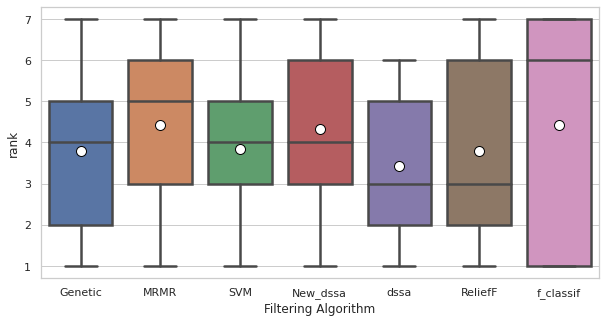

In [ ]:
import seaborn as sns


plt.figure(figsize=(10,5))

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Filtering Algorithm", y="rank",data=algo_ranking,orient="v",linewidth=2.5,
            showmeans=True,  meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
# sns.swarmplot(x="Filtering Algorithm", y="rank",data=algo_ranking, color=".25")
# plt.ylim(reversed(plt.ylim()))
# sns.despine(offset=10, trim=True)

In [ ]:
def bin_func(x):
    if x<=100:
        return "1-100"
    elif x<=200:
        return "100-200"
    return "200+"

algo_ranking["bin_n_sample"]= algo_ranking["Number of samples"].apply(lambda x: bin_func(x))

In [ ]:
algo_ranking

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features,rank,bin_n_sample
7574,scikit_arcene,Genetic,3,SVC,0.565499,0.000006,4.5,681.031457,200.0,9961.0,7,100-200
7622,scikit_arcene,MRMR,1,LogisticRegression,0.549495,0.000003,4.5,267.485115,200.0,9961.0,6,100-200
7804,scikit_arcene,SVM,1,SVC,0.526199,0.000024,4.5,1203.719039,200.0,9961.0,5,100-200
7687,scikit_arcene,New_dssa,2,LogisticRegression,0.448895,0.000003,4.5,684.072023,200.0,9961.0,4,100-200
7869,scikit_arcene,dssa,2,SVC,0.433949,0.000020,4.5,677.016944,200.0,9961.0,3,100-200
...,...,...,...,...,...,...,...,...,...,...,...,...
59,ARFF_Breast,Genetic,100,SVC,0.823103,0.014161,0.0,137.009383,97.0,24188.0,5,1-100
153,ARFF_Breast,New_dssa,15,RandomForestClassifier,0.767690,2.916305,0.0,336.901068,97.0,24188.0,4,1-100
293,ARFF_Breast,SVM,50,RandomForestClassifier,0.719309,2.399921,0.0,2062.019784,97.0,24188.0,3,1-100
358,ARFF_Breast,dssa,100,RandomForestClassifier,0.706522,3.070847,0.0,327.895947,97.0,24188.0,2,1-100


In [ ]:
from itertools import count
algo_ranking[algo_ranking["Filtering Algorithm"]=="MRMR"]["Number of samples"].describe()

# algo_ranking[algo_ranking["Filtering Algorithm"]=="MRMR"].groupby("bin_n_sample").count()

count      19.000000
mean      220.157895
std       300.941165
min        60.000000
25%       106.500000
50%       171.000000
75%       201.500000
max      1440.000000
Name: Number of samples, dtype: float64

In [ ]:
temp=algo_ranking.groupby(["bin_n_sample","Filtering Algorithm"])["value"].mean().reset_index()
temp

,bin_n_sample,Filtering Algorithm,value
0,1-100,Genetic,0.847485
1,1-100,MRMR,0.805353
2,1-100,New_dssa,0.787651
3,1-100,ReliefF,0.930472
4,1-100,SVM,0.801406
5,1-100,dssa,0.787572
6,1-100,f_classif,0.938199
7,100-200,Genetic,0.726530
8,100-200,MRMR,0.731457
9,100-200,New_dssa,0.745309


<AxesSubplot:xlabel='bin_n_sample', ylabel='value'>

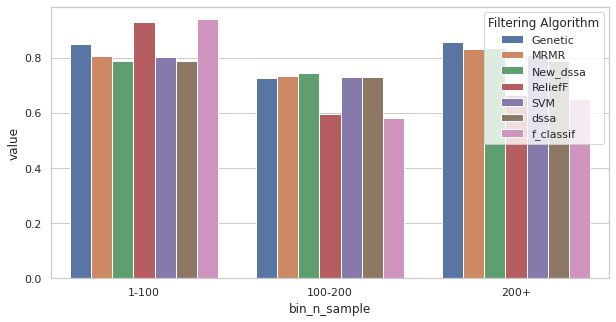

In [ ]:
# plt.ylim(reversed(plt.ylim()))
# plt.gca().invert_yaxis()
plt.figure(figsize=(10,5))
sns.barplot(x="bin_n_sample", y="value", hue="Filtering Algorithm", data=temp)
# plt.ylim(reversed(plt.ylim()))

# plt.gca().invert_yaxis()

